In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def getFileName(path):
    f_list = os.listdir(path)
    result = []
    for i in f_list:
        if os.path.splitext(i)[1] == '.csv':
            result.append(i)
    return result

In [3]:
p_list = getFileName('politics')
c_list = getFileName('celebrities')
s_list = getFileName('sports')

In [4]:
len(p_list)

14

In [5]:
c_list

['lebronlanceLSTM.csv',
 'justinbieberLSTM.csv',
 'bradyLSTM.csv',
 'kimxiLSTM.csv',
 'RonaldotoMonacoLSTM.csv',
 'ufcconorLSTM.csv',
 'DTwinLSTM.csv',
 'Kim-KardashianLSTM.csv',
 'ObamabetterthanAllRepLSTM.csv']

In [6]:
s_list

['ItalyFailWCLSTM.csv',
 'lebronlanceLSTM.csv',
 'bradyLSTM.csv',
 'realmadridLSTM.csv',
 'RonaldotoMonacoLSTM.csv',
 'ufcconorLSTM.csv',
 'pelicanfanLSTM.csv',
 'RomareverseBarcaLSTM.csv']

In [7]:
def calculate(filelist,folderpath):
    result = []
    for i in range(len(filelist)):
        df = pd.read_csv(folderpath + filelist[i])
        toxic = 0
        clean = 0
        total = 0
        tmp = [0]*2
        for row in df.itertuples():
            if float(row[3]) >= 0.4:
                toxic += 1
            else:
                clean += 1
        total = clean + toxic
        tmp[0] = toxic/total
        tmp[1] = clean/total
        result.append(tmp)
    return result

In [8]:
p_result = calculate(p_list,'politics/')
p_result

[[0.15801919599387954, 0.8419808040061204],
 [0.10610104861773118, 0.8938989513822688],
 [0.19507908611599298, 0.804920913884007],
 [0.1520428667113195, 0.8479571332886805],
 [0.09935205183585313, 0.9006479481641468],
 [0.13725490196078433, 0.8627450980392157],
 [0.13366336633663367, 0.8663366336633663],
 [0.14407949213359095, 0.855920507866409],
 [0.15838303512259774, 0.8416169648774022],
 [0.09090909090909091, 0.9090909090909091],
 [0.1657955258206147, 0.8342044741793854],
 [0.11419399220362302, 0.885806007796377],
 [0.15817601930868028, 0.8418239806913197],
 [0.19808743169398907, 0.8019125683060109]]

In [26]:
s_result = calculate(s_list,'sports/')
len(s_result)

8

In [27]:
c_result = calculate(c_list,'celebrities/')
len(c_result)

9

In [11]:
def drawPillar_politics(result):
    n_groups = len(result)
    toxic = []
    clean = []
    for i in result:
        toxic.append(i[0])
        clean.append(i[1])
    fig, ax = plt.subplots()    
    index = np.arange(n_groups)    
    bar_width = 0.35    
         
    opacity = 0.4    
    rects1 = plt.bar(index, toxic, bar_width,alpha=opacity, color='b',label='toxic')    
    rects2 = plt.bar(index + bar_width, clean, bar_width,alpha=opacity,color='r',label='clean')    
         
    plt.xlabel('topic')    
    plt.ylabel('comment percentage')    
    plt.title('comment percentage of different topics in politics')    
#     plt.xticks(index + bar_width, p_list)    
    plt.ylim(0,1);    
    plt.legend();    
      
    plt.tight_layout();   
    plt.show();

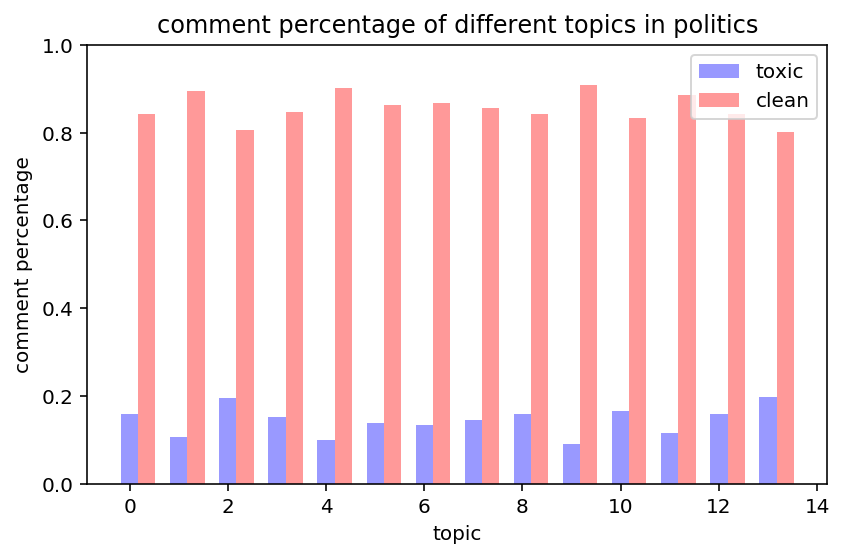

In [13]:
import numpy as np
drawPillar_politics(p_result)

In [14]:
def drawPillar_sports(result):
    n_groups = len(result)
    toxic = []
    clean = []
    for i in result:
        toxic.append(i[0])
        clean.append(i[1])
    fig, ax = plt.subplots()    
    index = np.arange(n_groups)    
    bar_width = 0.35    
         
    opacity = 0.4    
    rects1 = plt.bar(index, toxic, bar_width,alpha=opacity, color='b',label='toxic')    
    rects2 = plt.bar(index + bar_width, clean, bar_width,alpha=opacity,color='r',label='clean')    
         
    plt.xlabel('topic')    
    plt.ylabel('comment percentage')    
    plt.title('comment percentage of different topics in sports')    
#     plt.xticks(index + bar_width, p_list)    
    plt.ylim(0,1);    
    plt.legend();    
      
    plt.tight_layout();   
    plt.show();

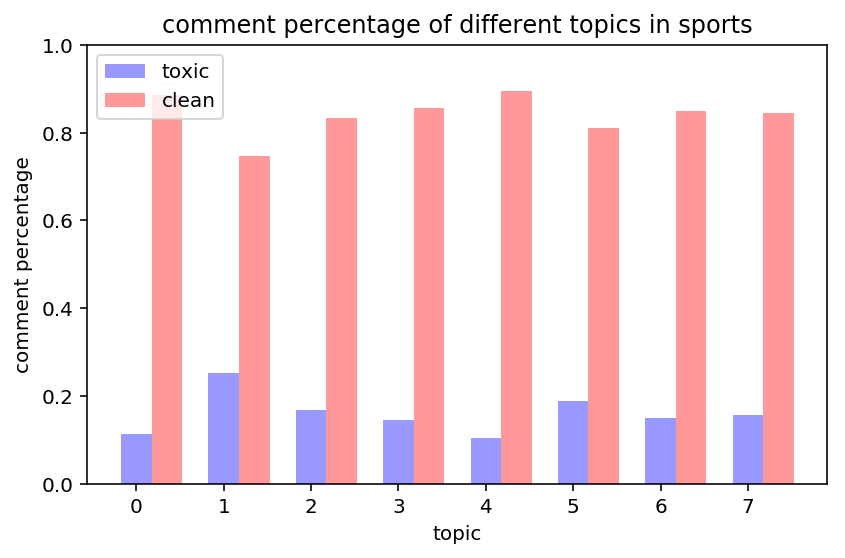

In [15]:
drawPillar_sports(s_result)

In [24]:
def drawPillar_c(result):
    n_groups = len(result)
    toxic = []
    clean = []
    for i in result:
        toxic.append(i[0])
        clean.append(i[1])
    fig, ax = plt.subplots()    
    index = np.arange(n_groups)    
    bar_width = 0.35    
         
    opacity = 0.4    
    rects1 = plt.bar(index, toxic, bar_width,alpha=opacity, color='b',label=    'toxic')    
    rects2 = plt.bar(index + bar_width, clean, bar_width,alpha=opacity,color='r',label='clean')    
         
    plt.xlabel('topic')    
    plt.ylabel('comment percentage')    
    plt.title('comment percentage of different topics in celebrities')    
#     plt.xticks(index + bar_width, p_list)    
    plt.ylim(0,1);    
    plt.legend();    
      
    plt.tight_layout();   
    plt.show();

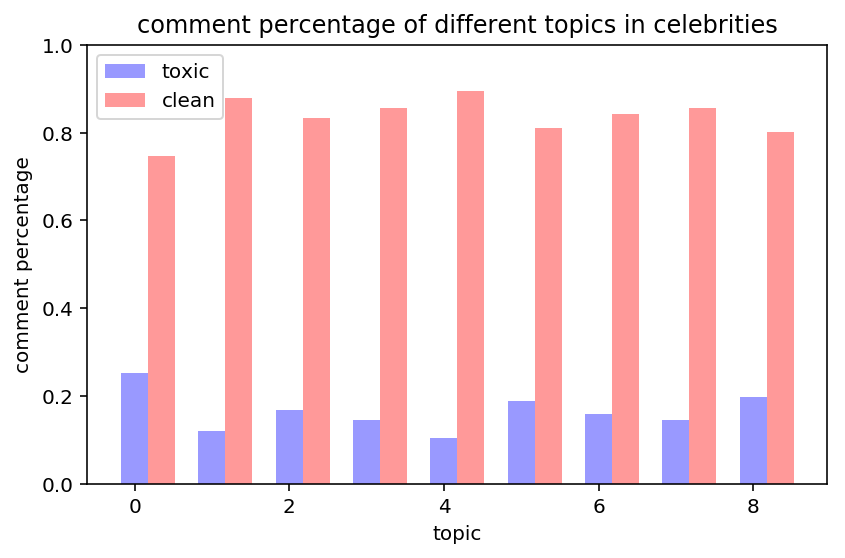

In [25]:
drawPillar_c(c_result)

In [18]:
def average_toxic(result):
    toxic_total = 0
    for i in range(len(result)):
        toxic_total += result[i][0]
    return toxic_total/len(result)

In [21]:
p_average = average_toxic(p_result)
c_average = average_toxic(c_result)
s_average = average_toxic(s_result)

In [20]:
p_average

0.1436526503403129

In [22]:
c_average

0.16432785262883737

In [23]:
s_average

0.15986610427409254